In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\LPU\sem-5\UPGRAD\EDA\DataSets\loan.csv",low_memory = False)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(7), object(29)
memory usage: 33.6+ MB


### Data wrangling
#### Data Cleaning and Data manipulation

In [5]:
df.dropna(axis = 1,inplace=True)

In [6]:
#finding the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [7]:
#checking id and member id if the contain all distinct values or not so that i can drop them
df[["id","member_id"]].nunique()

id           39717
member_id    39717
dtype: int64

In [8]:
#dropping columns on the basis of i dex location
#iloc is use to pass index of columns of rows and columns
df.drop(df.iloc[:,0:2],inplace = True,  axis = 1)

In [9]:
#finding unique types of home ownership
df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [10]:
#df["emp_length"]

In [11]:
#df["emp_title"].unique()

In [12]:
df["grade"].value_counts(normalize = True)

B    0.302641
A    0.253921
C    0.203893
D    0.133620
E    0.071556
F    0.026412
G    0.007956
Name: grade, dtype: float64

In [13]:
df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [14]:
verif =  df["verification_status"].value_counts(normalize = True)

In [15]:
df["loan_status"].value_counts(normalize = True).plot(kind="")

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

<AxesSubplot:>

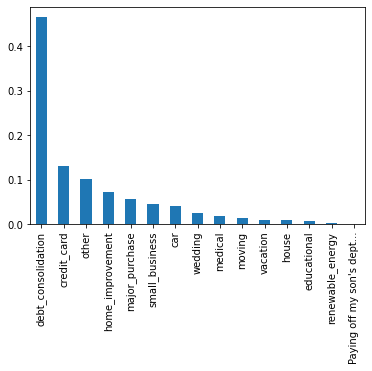

In [56]:
df["purpose"].value_counts(normalize = True).plot(kind= "bar")

In [17]:

issue = df["issue_d"].str.split("-", n = 1, expand= True)

df["issue_month"] = issue[1]
df["issue_month"].value_counts(normalize = True)

Dec    0.111615
Nov    0.104917
Oct    0.099051
Sep    0.091850
Aug    0.088577
Jul    0.087519
Jun    0.082559
May    0.075509
Apr    0.071355
Mar    0.067780
Jan    0.059899
Feb    0.059370
Name: issue_month, dtype: float64

In [18]:

df["int_rate"] = df["int_rate"].str.strip("%")

In [19]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0,1,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0,1,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0,1,Dec
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0,1,Dec


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  pymnt_plan               39717 non-null  object 
 14  url                   

In [24]:
fig,axs = plt.(figsize = (10,5))

sns.boxplot(x=df["loan_amnt"], notch = True , color= "orange")



SyntaxError: invalid syntax (Temp/ipykernel_16816/1205764735.py, line 1)

In [25]:


#term = df["term"].str.split(" ",n=1,expand = True)
#df["term"] = term[1]

df["term"] = df["term"].str.strip(" months")


In [26]:
df["term"] = df["term"].convert_dtypes("int64")
term_value = df["term"].value_counts(normalize= True)


In [27]:
df["term"].unique()

<StringArray>
['36', '60']
Length: 2, dtype: string

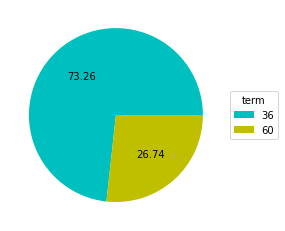

In [28]:
from matplotlib import pyplot as plt
term = [36,60]
plt.pie(term_value ,colors="cyan" ,autopct="%.2f")

plt.legend( term,
          title ="term",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 

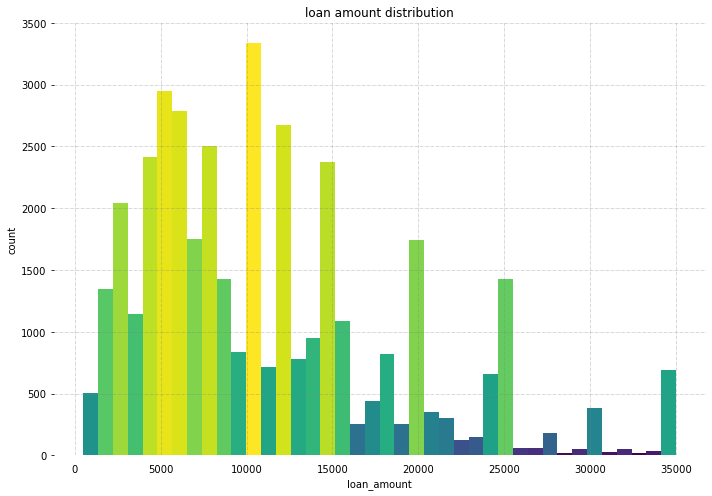

In [29]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


# Creating distribution
x = df["loan_amnt"]



# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize=(10, 7),
                        tight_layout=True)


# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')


# Add padding between axes and labels
axs.xaxis.set_tick_params(pad=5)

# Add x, y gridlines
axs.grid(b=True, color='grey',
         linestyle='-.', linewidth=0.5,
         alpha=0.6)




# Creating histogram
N, bins, patches = axs.hist(x, bins= 40)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding extra features
plt.xlabel("loan_amount")
plt.ylabel("count")
plt.title('loan amount distribution')

# Show plot
plt.show()


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

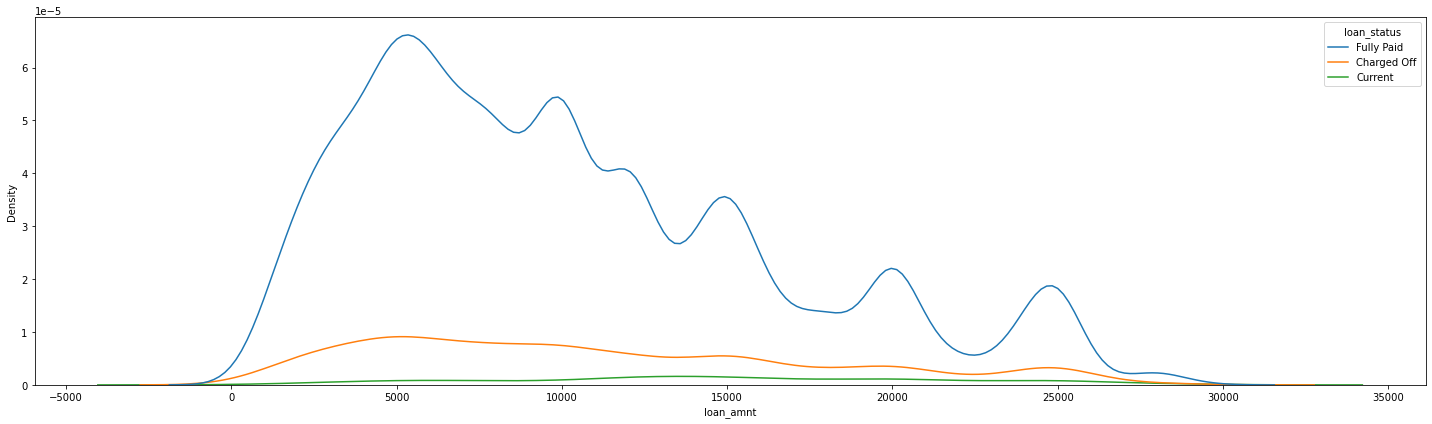

In [46]:
fig, axs = plt.subplots(1, 1,
                        figsize=(20,6),
                        tight_layout=True)

sns.kdeplot(x ="loan_amnt",hue = "loan_status",data=df)


<AxesSubplot:title={'center':'Number of issue each month'}>

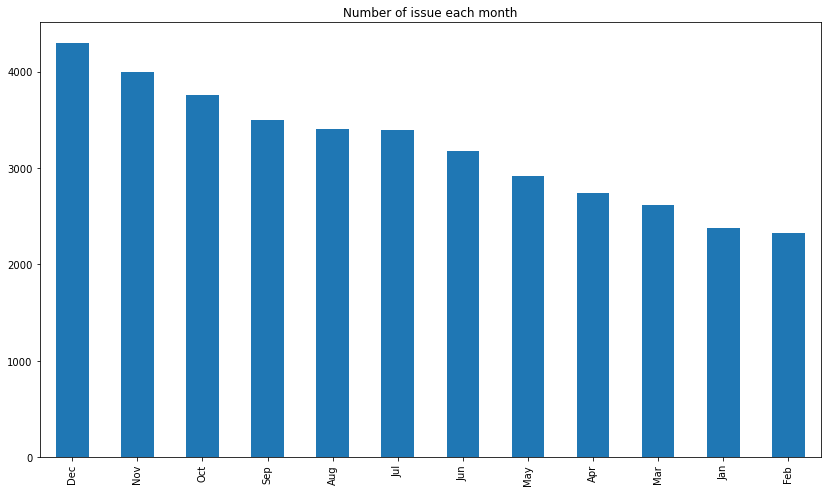

In [42]:
df["issue_month"].value_counts().plot(kind= "bar",
                                      figsize=(14, 8),
                                      title="Number of issue each month")


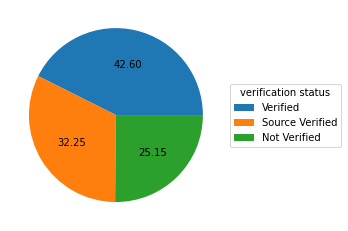

In [32]:
plt.pie(verif,autopct="%.2f")


plt.legend(df["verification_status"].unique(),
           title="verification status",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))


AttributeError: 'Rectangle' object has no property 'hue'

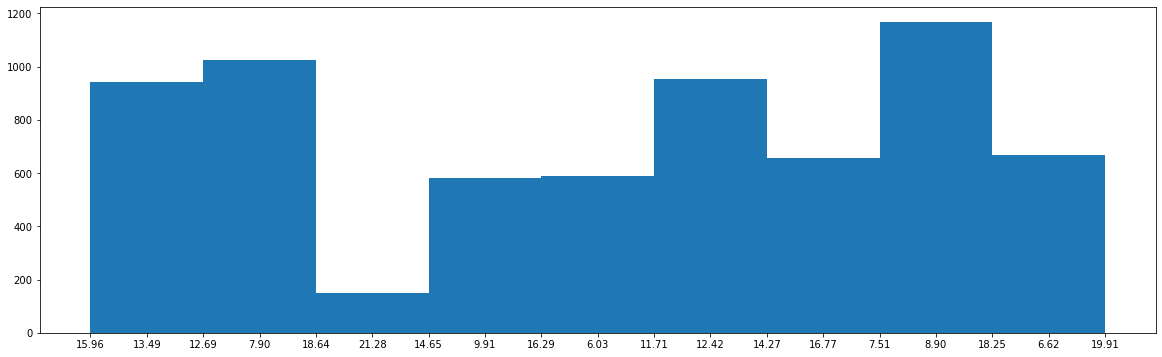

In [43]:
fig,ax = plt.subplots(figsize= (20,6)) 
ax.hist(df["int_rate"],bins = [2,4,6,8,10,12,14,16,18,20])

In [34]:
df["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

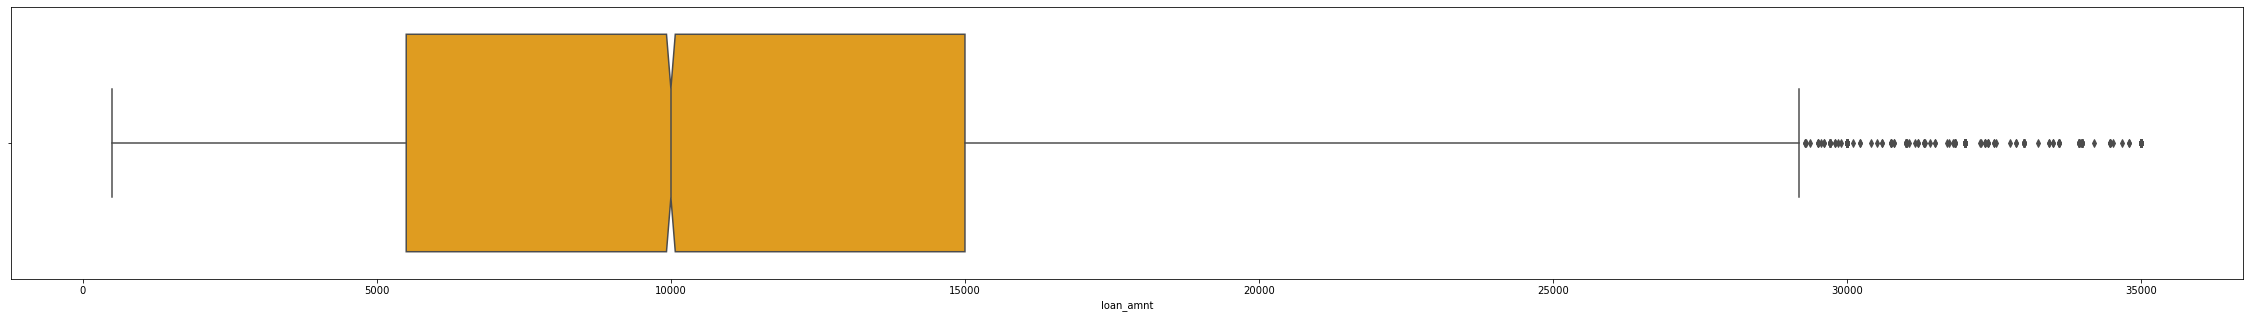

In [33]:
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(x=df["loan_amnt"], notch=True, color="orange")


In [35]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df["loan_amnt"]))
print(z)

0        0.834088
1        1.169363
2        1.182774
3        0.163539
4        1.102308
           ...   
39712    1.169363
39713    0.364704
39714    0.834088
39715    0.834088
39716    0.498814
Name: loan_amnt, Length: 39717, dtype: float64


In [36]:
import sklearn 

Q1 = np.percentile(df["loan_amnt"], 25 , interpolation= "midpoint")
Q3 = np.percentile(df["loan_amnt"], 75 , interpolation= "midpoint")

IQR = Q3 - Q1

upper = np.where(df["loan_amnt"] >= (Q3 + 1.5*IQR))
lower = np.where(df["loan_amnt"] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0] , inplace = True)


<AxesSubplot:xlabel='loan_amnt'>

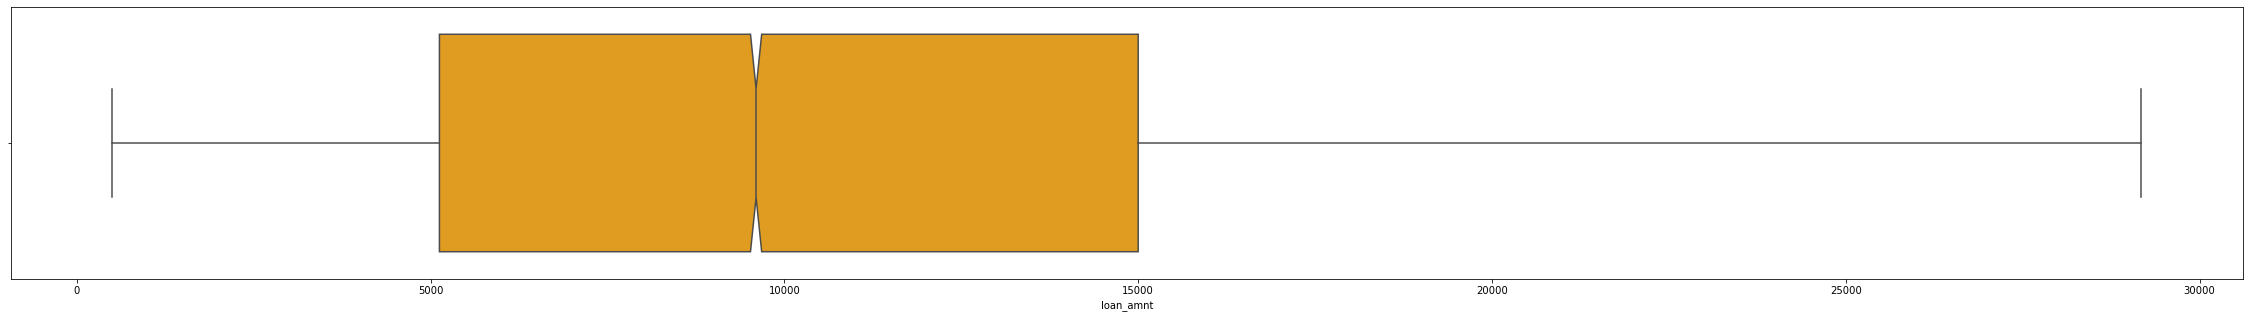

In [36]:
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(x=df["loan_amnt"], notch=True, color="orange")


<AxesSubplot:>

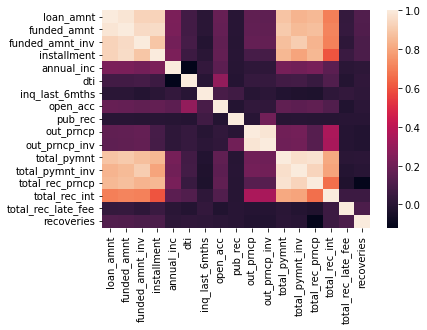

In [49]:
corrm = df.corr()
sns.heatmap(corrm)

ValueError: num must be 1 <= num <= 3, not 4

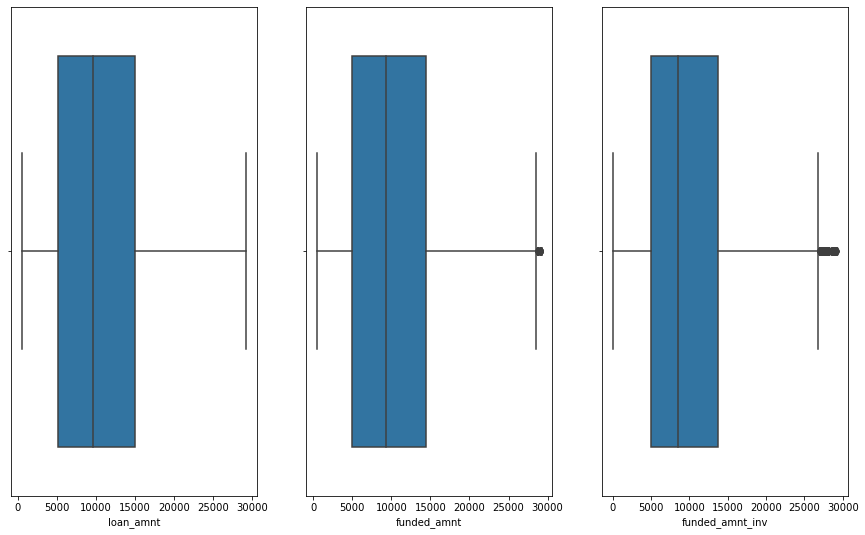

In [54]:
cols = 3
rows = 1
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(15, 9))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i+1)

    sns.boxplot(x=df[col], ax=ax)

fig.tight_layout()
plt.show()


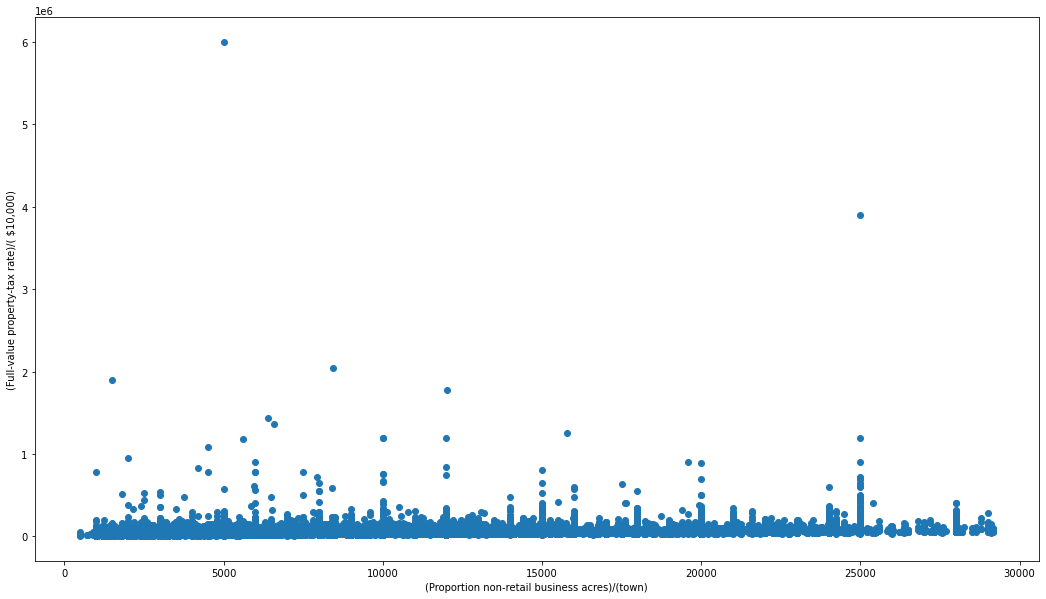

In [57]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(df['loan_amnt'], df['annual_inc'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()
